## Support Vector Machine

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('./AI_DATA/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Finding correlation between features using heatmap

Text(0.5, 1.0, 'Data Correlation')

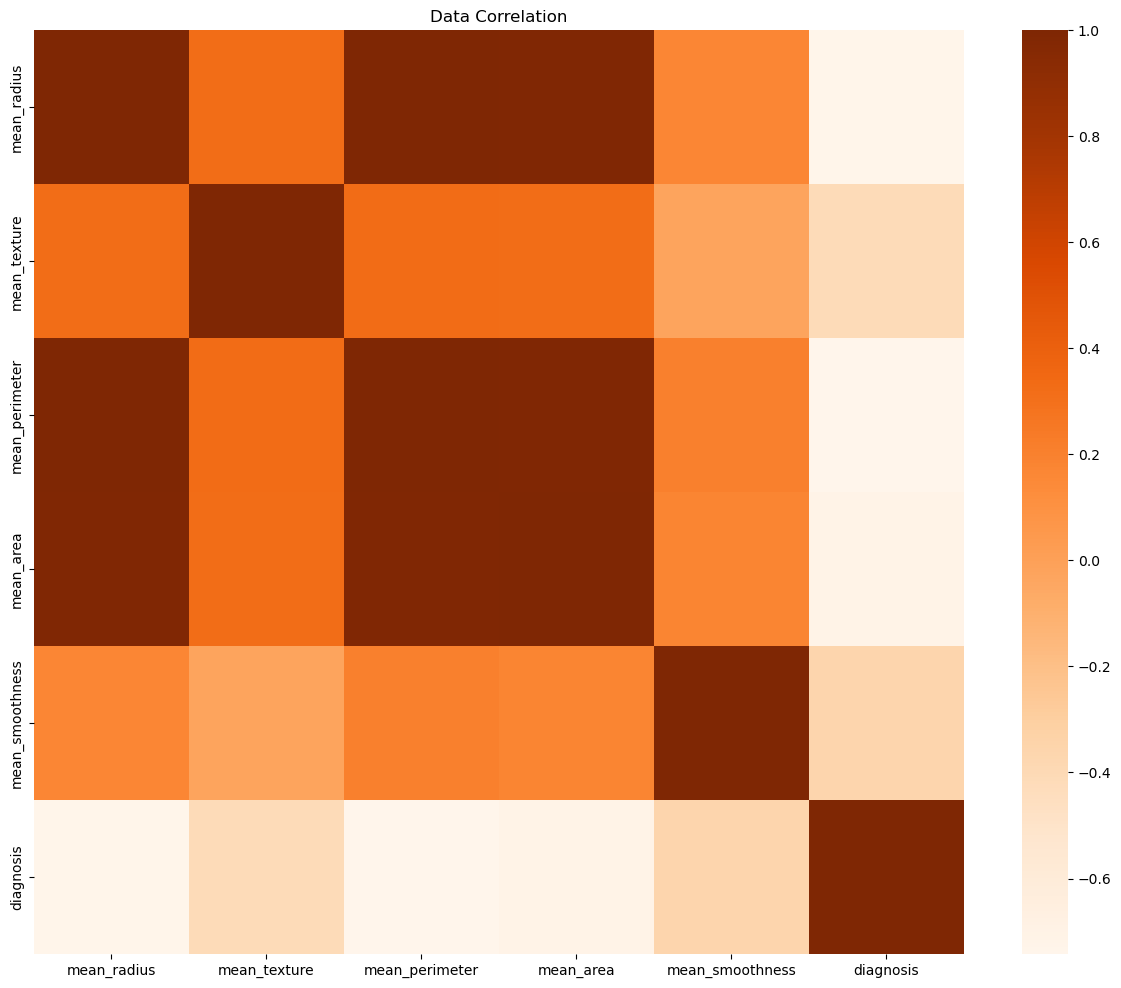

In [12]:
corr = data.corr()
fig = plt.figure(figsize=(15,12))
a = sns.heatmap(corr,cmap='Oranges')
a.set_title("Data Correlation")

### Creating a Model

In [19]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

svc_diag = SVC(C=10,kernel='linear')
svc_diag.fit(X_train,y_train)
y_pred = svc_diag.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(acc_svc*100,2))

Accuracy Score: 89.47


### Optimizing the Parameters (C=10,gamma=2,kernel='rbf')

In [20]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

svc_diag = SVC(C=10,kernel='rbf',gamma=2)
svc_diag.fit(X_train,y_train)
y_pred = svc_diag.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(acc_svc*100,2))

Accuracy Score: 63.16


## Q2

In [31]:
import pandas as pd
dataset = pd.read_csv('./AI_DATA/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 90.83


### Changing Kernel = linear 

In [41]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 86.67


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        79
           1       0.88      0.71      0.78        41

    accuracy                           0.87       120
   macro avg       0.87      0.83      0.84       120
weighted avg       0.87      0.87      0.86       120



### K-fold value as 10 and kernel = linear

In [44]:
from sklearn.model_selection import cross_val_score
svc = SVC(kernel='linear')
scores = cross_val_score(svc,X,y,cv=10,scoring='accuracy')
print(scores.mean())

0.82


### kernel = linear and C=0.1 and Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

clf = SVC(kernel='linear',C=0.1)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

[[76  3]
 [16 25]]
Accuracy Score: 84.17


### Kernel = rbf and gamma = 0.01

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf',gamma=0.01)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

[[76  3]
 [16 25]]
Accuracy Score: 84.17


### kernel = poly and degree = 2

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = SVC(kernel='poly',degree=2)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

[[71  8]
 [22 19]]
Accuracy Score: 75.0


### Using GridSearchCV()

In [52]:
import numpy as np
tuned_parameters = {
    'C':(np.arange(0.1,1.0,0.1)),
    'kernel':['linear','rbf','poly'],
    'gamma':[0.01,0.02,0.03,0.04,0.05],
    'degree':[2,3,4]
}

from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(SVC(),tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(X_train,y_train)

print(model_svm.best_score_,'\n')
print(model_svm.best_params_,'\n')
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

0.8714285714285713 

{'C': 0.9, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'} 

Accuracy Score: 75.0
